In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../transactions.csv')
df.punk_id = df.punk_id.astype(int)
df.drop('Unnamed: 0',axis=1,inplace=True)
df['Txn'] = df['Txn'].astype('datetime64')
#df.set_index('punk_id',inplace=True)
df.head()

,Amount,From,To,Txn,Type,punk_id,amount_ethereum,amount_dollars
0,250Ξ ($1.03M),0x983ace,NaN,2021-05-10,Bid Withdrawn,0,250.0,1030000.0
1,"250Ξ ($537,615)",0x983ace,NaN,2021-04-11,Bid,0,250.0,537615.0
2,"100Ξ ($160,973)",0xd7510a,NaN,2021-03-03,Bid Withdrawn,0,100.0,160973.0
3,"100Ξ ($188,897)",0xd7510a,NaN,2021-02-20,Bid,0,100.0,188897.0
4,"69Ξ ($25,532)",natealex,NaN,2020-09-16,Bid Withdrawn,0,69.0,25532.0


In [3]:
df.shape

(92823, 8)

In [4]:
punks = pd.read_csv('../Fase1_ETL/to_database/raw_punks.csv')
punks.drop('Unnamed: 0',axis=1,inplace=True)
#punks.set_index('id',inplace=True)

In [5]:
punks.head()

,id,types,rarity,skin,total_traits,traits,total_hidden_traits,hidden_traits
0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring
1,1,Male,4352,Dark,2,"Mohawk,Smile",0,NaN
2,2,Female,8090,Light,1,Wild Hair,0,NaN
3,3,Male,7896,Dark,3,"Nerd Glasses,Pipe,Wild Hair",0,NaN
4,4,Male,7332,Mid,4,"Big Shades,Earring,Goat,Wild Hair",0,NaN


In [6]:
punks.shape

(10000, 8)

In [7]:
aggregated_df = df.merge(punks, how='left',left_on='punk_id',right_on='id',left_index=False, right_index=False, sort=False)
aggregated_df.head()

,Amount,From,To,Txn,Type,punk_id,amount_ethereum,amount_dollars,id,types,rarity,skin,total_traits,traits,total_hidden_traits,hidden_traits
0,250Ξ ($1.03M),0x983ace,NaN,2021-05-10,Bid Withdrawn,0,250.0,1030000.0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring
1,"250Ξ ($537,615)",0x983ace,NaN,2021-04-11,Bid,0,250.0,537615.0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring
2,"100Ξ ($160,973)",0xd7510a,NaN,2021-03-03,Bid Withdrawn,0,100.0,160973.0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring
3,"100Ξ ($188,897)",0xd7510a,NaN,2021-02-20,Bid,0,100.0,188897.0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring
4,"69Ξ ($25,532)",natealex,NaN,2020-09-16,Bid Withdrawn,0,69.0,25532.0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring


In [8]:
aggregated_df.Type.unique()

array(['Bid Withdrawn', 'Bid', 'Sold', 'Offered'], dtype=object)

In [9]:
# get punks who have been sold at least once

In [10]:
aggregated_df['Sold'] = np.where((aggregated_df['Type']=="Sold"), 1, 0)

In [11]:
filter_dataset = aggregated_df[aggregated_df.Sold == 1]['punk_id']

In [12]:
selected_punks = filter_dataset.unique().tolist()

In [13]:
# add column where to keep those punks of not

In [14]:
aggregated_df['keep']= aggregated_df.punk_id.apply(lambda x: x in selected_punks)

In [15]:
aggregated_df.head()

,Amount,From,To,Txn,Type,punk_id,amount_ethereum,amount_dollars,id,types,rarity,skin,total_traits,traits,total_hidden_traits,hidden_traits,Sold,keep
0,250Ξ ($1.03M),0x983ace,NaN,2021-05-10,Bid Withdrawn,0,250.0,1030000.0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring,0,True
1,"250Ξ ($537,615)",0x983ace,NaN,2021-04-11,Bid,0,250.0,537615.0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring,0,True
2,"100Ξ ($160,973)",0xd7510a,NaN,2021-03-03,Bid Withdrawn,0,100.0,160973.0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring,0,True
3,"100Ξ ($188,897)",0xd7510a,NaN,2021-02-20,Bid,0,100.0,188897.0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring,0,True
4,"69Ξ ($25,532)",natealex,NaN,2020-09-16,Bid Withdrawn,0,69.0,25532.0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring,0,True


In [16]:
# keep those punks only
aggregated_df = aggregated_df[aggregated_df.keep == True]

In [17]:
bids = aggregated_df[(aggregated_df['Type']=='Bid') | (aggregated_df['Type']=='Bid Withdrawn')]
bids.head()

,Amount,From,To,Txn,Type,punk_id,amount_ethereum,amount_dollars,id,types,rarity,skin,total_traits,traits,total_hidden_traits,hidden_traits,Sold,keep
0,250Ξ ($1.03M),0x983ace,NaN,2021-05-10,Bid Withdrawn,0,250.0,1030000.0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring,0,True
1,"250Ξ ($537,615)",0x983ace,NaN,2021-04-11,Bid,0,250.0,537615.0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring,0,True
2,"100Ξ ($160,973)",0xd7510a,NaN,2021-03-03,Bid Withdrawn,0,100.0,160973.0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring,0,True
3,"100Ξ ($188,897)",0xd7510a,NaN,2021-02-20,Bid,0,100.0,188897.0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring,0,True
4,"69Ξ ($25,532)",natealex,NaN,2020-09-16,Bid Withdrawn,0,69.0,25532.0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring,0,True


In [18]:
df_agg = bids[['From','To','Txn','punk_id','Type','amount_ethereum','types','skin','rarity','traits']].reset_index(drop=True)

In [19]:
df_agg.head()

,From,To,Txn,punk_id,Type,amount_ethereum,types,skin,rarity,traits
0,0x983ace,NaN,2021-05-10,0,Bid Withdrawn,250.0,Female,Mid,2023,"Blonde Bob,Earring,Green Eye Shadow"
1,0x983ace,NaN,2021-04-11,0,Bid,250.0,Female,Mid,2023,"Blonde Bob,Earring,Green Eye Shadow"
2,0xd7510a,NaN,2021-03-03,0,Bid Withdrawn,100.0,Female,Mid,2023,"Blonde Bob,Earring,Green Eye Shadow"
3,0xd7510a,NaN,2021-02-20,0,Bid,100.0,Female,Mid,2023,"Blonde Bob,Earring,Green Eye Shadow"
4,natealex,NaN,2020-09-16,0,Bid Withdrawn,69.0,Female,Mid,2023,"Blonde Bob,Earring,Green Eye Shadow"


In [20]:
df_agg.Type.unique()

array(['Bid Withdrawn', 'Bid'], dtype=object)

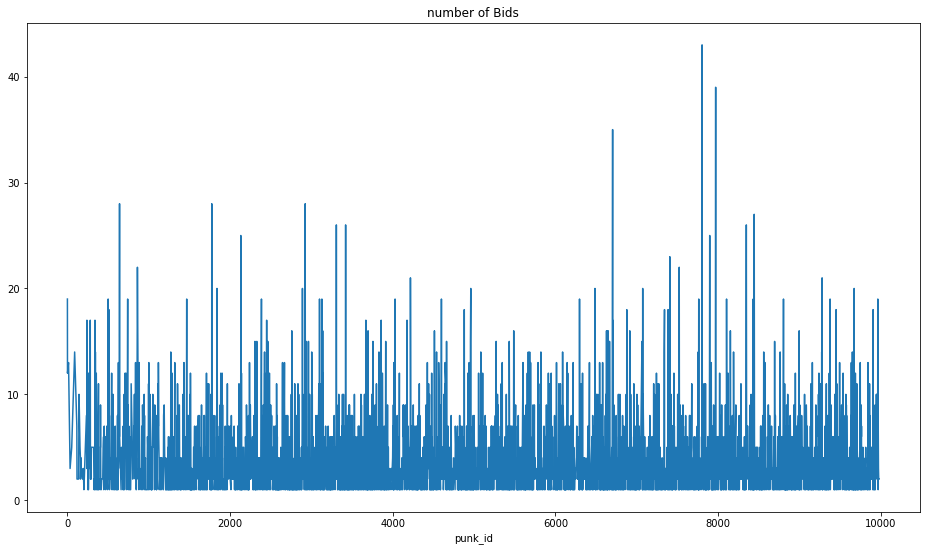

In [21]:
plt.subplots(figsize=(16,9))
df_agg[df_agg.Type =='Bid'].groupby('punk_id')['Type'].count().plot()
plt.title ('number of Bids')
plt.show()

In [22]:
df_count_bids = df_agg[df_agg.Type =='Bid'].groupby('punk_id')['Type'].count().to_frame(name='total_bids')
df_count_bids_withdrawn = df_agg[df_agg.Type =='Bid Withdrawn'].groupby('punk_id')['Type'].count().to_frame(name='total_bids_withdrawn')
df_mean_price = df_agg[df_agg.Type =='Bid'].groupby('punk_id')['amount_ethereum'].mean().to_frame(name='avg_bid_price')

In [23]:
df_counts = pd.concat([df_count_bids,df_count_bids_withdrawn,df_mean_price,punks],axis=1)
df_counts = df_counts[['total_bids','total_bids_withdrawn','avg_bid_price','types','rarity','skin']]

In [24]:
#df_counts.fillna(0,inplace=True)
# remove item with NA as they do not exist in this subset
df_counts.dropna(inplace=True)
df_counts['bids-bids withdrawn'] = df_counts.total_bids - df_counts.total_bids_withdrawn
df_counts.head(10)

,total_bids,total_bids_withdrawn,avg_bid_price,types,rarity,skin,bids-bids withdrawn
0,19.0,8.0,33.181579,Female,2023,Mid,11.0
1,12.0,6.0,14.827500,Male,4352,Dark,6.0
14,13.0,6.0,7.906154,Female,155,Dark,7.0
33,3.0,2.0,0.903333,Male,7635,Light,1.0
53,5.0,4.0,17.800000,Female,2825,Light,1.0
89,14.0,7.0,18.465714,Female,125,Dark,7.0
116,7.0,5.0,7.414286,Female,220,Dark,2.0
118,2.0,2.0,9.600000,Female,9954,Light,0.0
141,6.0,4.0,22.046667,Male,6115,Dark,2.0
143,10.0,6.0,66.311000,Male,91,Light,4.0


In [25]:
df_raros = df_counts[df_counts.rarity<101].sort_values(by='rarity')
df_otros = df_counts[df_counts.rarity>101].sort_values(by='rarity')

In [26]:
df_raros['tipo'] = df_raros.types.map({'Male':'humano','Female':'humano','Ape':'rest','Zombie':'rest','Alien':'rest'})
df_raros.head()


,total_bids,total_bids_withdrawn,avg_bid_price,types,rarity,skin,bids-bids withdrawn,tipo
8348,26.0,11.0,41.545385,Male,1,Mid,15.0,humano
6487,20.0,16.0,170.066000,Female,2,Albino,4.0,humano
3307,26.0,13.0,16.832692,Male,3,Albino,13.0,humano
741,19.0,11.0,9.270000,Male,5,Dark,8.0,humano
641,28.0,15.0,18.758571,Female,6,Light,13.0,humano


In [27]:
# aquellos que tienen 1 o mas pujas
df_raros = df_raros[df_raros['bids-bids withdrawn']>0]


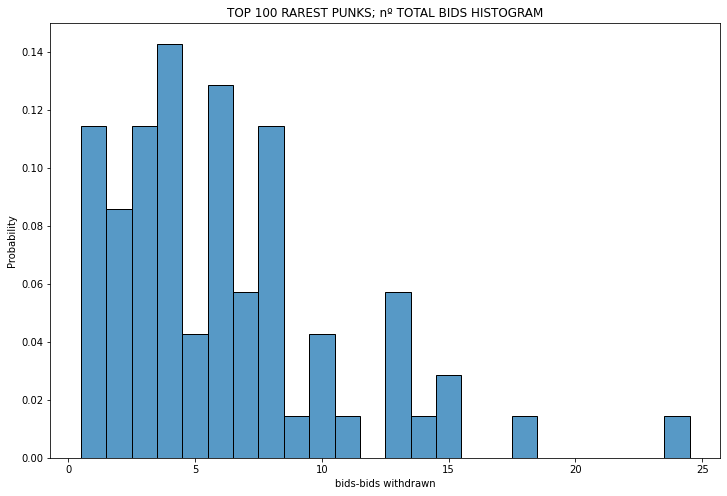

,total_bids,total_bids_withdrawn,avg_bid_price,types,rarity,skin,bids-bids withdrawn,tipo
8348,26.0,11.0,41.545385,Male,1,Mid,15.0,humano
6487,20.0,16.0,170.066000,Female,2,Albino,4.0,humano
3307,26.0,13.0,16.832692,Male,3,Albino,13.0,humano
741,19.0,11.0,9.270000,Male,5,Dark,8.0,humano
641,28.0,15.0,18.758571,Female,6,Light,13.0,humano
...,...,...,...,...,...,...,...,...
9703,7.0,4.0,0.115714,Male,94,Dark,3.0,humano
8562,14.0,6.0,42.915714,Male,96,Dark,8.0,humano
5684,14.0,3.0,8.927143,Female,98,Dark,11.0,humano
5787,13.0,6.0,0.726154,Female,99,Mid,7.0,humano


In [28]:
fig,ax = plt.subplots(figsize=(12,8))
sns.histplot(data=df_raros['bids-bids withdrawn'],stat='probability',ax=ax,discrete=True)
plt.title ('TOP 100 RAREST PUNKS; nº TOTAL BIDS HISTOGRAM')
plt.show()
df_raros

In [29]:
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

In [30]:
mediana = df_raros['avg_bid_price'].median()
std = df_raros['avg_bid_price'].std()
perc_75 = df_raros['avg_bid_price'].quantile(.95)
print(mediana,std,perc_75)
upper, lower = outliers(df_raros, "avg_bid_price")
print(upper,lower)

29.73708333333333 76.55666832887984 162.33358571428568
174.37593750000002 -90.8085625


fig,ax = plt.subplots(figsize=(16,9))
sns.histplot(data=df_raros.avg_bid_price,bins=50,stat='frequency',ax=ax)
plt.show()

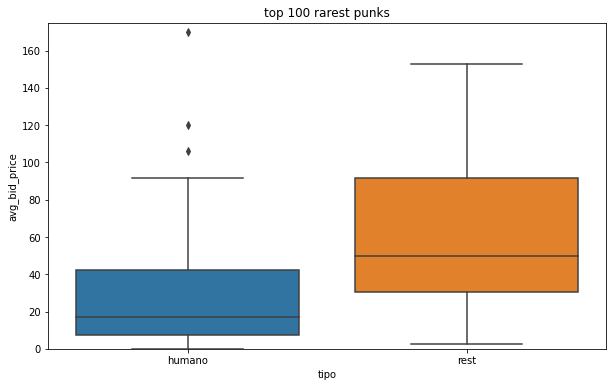

In [31]:
fig,ax = plt.subplots(figsize=(10,6))
sns.boxplot(x="tipo", y="avg_bid_price",data=df_raros[~(df_raros['avg_bid_price']>upper)],ax=ax)
sns.catplot
plt.title('top 100 rarest punks')
plt.ylim([0,175])
plt.show()

In [32]:
mediana = df_otros['avg_bid_price'].median()
std = df_otros['avg_bid_price'].std()
perc_75 = df_otros['avg_bid_price'].quantile(.95)
print(mediana,std,perc_75)
upper, lower = outliers(df_otros, "avg_bid_price")
print(upper,lower)

10.5 14.631596281569626 31.654
43.414062499999986 -23.448437499999994


10.5 14.631596281569626 18.340624999999996


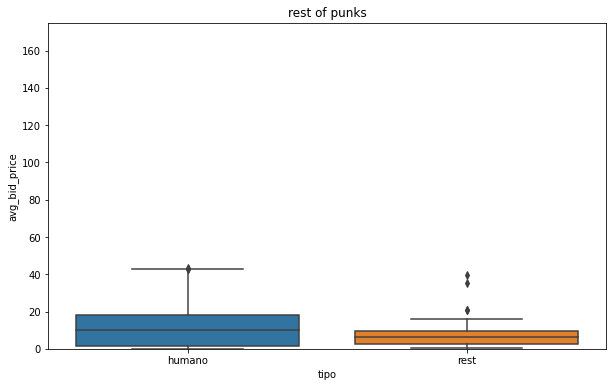

In [33]:
fig,ax = plt.subplots(figsize=(10,6))

mediana = df_otros['avg_bid_price'].median()
std = df_otros['avg_bid_price'].std()
perc_75 = df_otros['avg_bid_price'].quantile(.75)
print(mediana,std,perc_75)

#display(df_otros.head())
#display(df_otros.types.unique())
df_otros['tipo'] = df_otros.types.map({'Male':'humano','Female':'humano','Ape':'rest','Zombie':'rest','Alien':'rest'})
sns.boxplot(x="tipo", y="avg_bid_price",data=df_otros[~(df_otros['avg_bid_price']>upper)],ax=ax)
plt.title('rest of punks')
plt.ylim([0,175])
plt.show()

In [34]:
# aquellos que tienen 1 o mas pujas
df_otros = df_otros[df_otros['bids-bids withdrawn']>0]

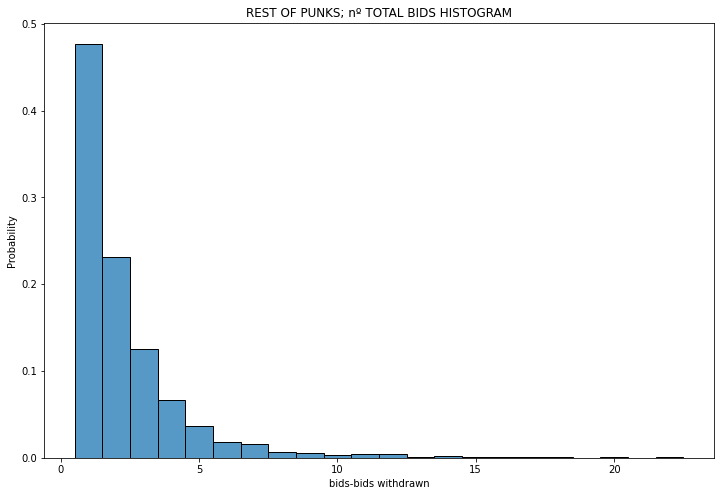

In [35]:
fig,ax = plt.subplots(figsize=(12,8))
sns.histplot(data=df_otros['bids-bids withdrawn'],bins=50,stat='probability',ax=ax,discrete=True)
plt.title ('REST OF PUNKS; nº TOTAL BIDS HISTOGRAM')
plt.show()

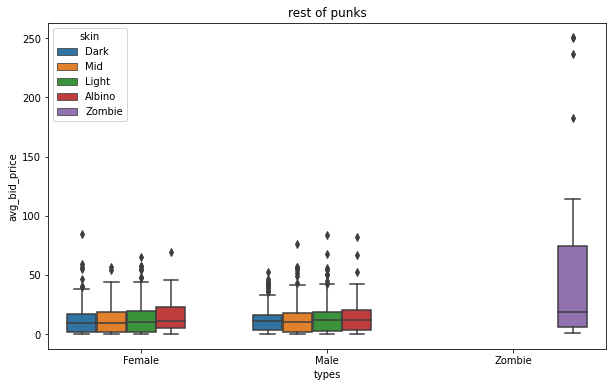

In [36]:
fig,ax = plt.subplots(figsize=(10,6))
sns.boxplot(x="types", y="avg_bid_price", hue='skin',data=df_otros,ax=ax)
sns.catplot
plt.title('rest of punks')
plt.show()